# Oil Spill Classification

This notebook introduced a dataset that will be used to classify whether an ocean patch contains an oil spill or not. This data originally came from images taken by satellites. Those images were then vectorized using a computer vision algorithm, and the result data is what you will see in this notebook.

## Import Libraries & Load Data

In [934]:
# Imports

import numpy as np
import pandas as pd
pd.options.display.max_columns = 999
from collections import Counter

import tensorflow as tf
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Dense, Activation,Input, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn import metrics
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.over_sampling import RandomOverSampler

import matplotlib.pyplot as plt
import seaborn as sns

In [935]:
# Load Data
df = pd.read_csv('C:\\Users\\ckjar\\Documents\\CS505\\Oil Spill Classificiation\\oil_spill.csv')
df.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,214.7,0.21,0.26,0.49,0.10,0.40,99.59,32.19,1.84,0.16,0.20,87.65,0,0.47,132.78,-0.01,3.78,0.22,3.20,-3.71,-0.18,2.19,0.0,2.19,310,16110,0.00,138.68,89,69,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,901.7,0.02,0.03,0.11,0.01,0.11,6058.23,4061.15,2.30,0.02,0.02,87.65,0,0.58,132.78,-0.01,3.78,0.84,7.09,-2.21,0.00,0.00,0.0,0.00,704,40140,0.00,68.65,89,69,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,86.1,0.21,0.32,0.50,0.17,0.34,71.20,16.73,1.82,0.19,0.29,87.65,0,0.46,132.78,-0.01,3.78,0.70,4.79,-3.36,-0.23,1.95,0.0,1.95,29,1530,0.01,38.80,89,69,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,166.5,0.21,0.26,0.48,0.10,0.38,120.22,33.47,1.91,0.16,0.21,87.65,0,0.48,132.78,-0.01,3.78,0.84,6.78,-3.54,-0.33,2.20,0.0,2.20,183,10080,0.00,108.27,89,69,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,232.8,0.15,0.19,0.35,0.09,0.26,289.19,48.68,1.86,0.13,0.16,87.65,0,0.47,132.78,-0.01,3.78,0.02,2.28,-3.44,-0.44,2.19,0.0,2.19,45,2340,0.00,14.39,89,69,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [936]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_1     937 non-null    int64  
 1   f_2     937 non-null    int64  
 2   f_3     937 non-null    float64
 3   f_4     937 non-null    float64
 4   f_5     937 non-null    int64  
 5   f_6     937 non-null    int64  
 6   f_7     937 non-null    float64
 7   f_8     937 non-null    float64
 8   f_9     937 non-null    float64
 9   f_10    937 non-null    float64
 10  f_11    937 non-null    float64
 11  f_12    937 non-null    float64
 12  f_13    937 non-null    float64
 13  f_14    937 non-null    float64
 14  f_15    937 non-null    float64
 15  f_16    937 non-null    float64
 16  f_17    937 non-null    float64
 17  f_18    937 non-null    float64
 18  f_19    937 non-null    float64
 19  f_20    937 non-null    float64
 20  f_21    937 non-null    float64
 21  f_22    937 non-null    float64
 22  f_

In [937]:
df.shape

(937, 50)

In [938]:
df.isnull().sum()

f_1       0
f_2       0
f_3       0
f_4       0
f_5       0
f_6       0
f_7       0
f_8       0
f_9       0
f_10      0
f_11      0
f_12      0
f_13      0
f_14      0
f_15      0
f_16      0
f_17      0
f_18      0
f_19      0
f_20      0
f_21      0
f_22      0
f_23      0
f_24      0
f_25      0
f_26      0
f_27      0
f_28      0
f_29      0
f_30      0
f_31      0
f_32      0
f_33      0
f_34      0
f_35      0
f_36      0
f_37      0
f_38      0
f_39      0
f_40      0
f_41      0
f_42      0
f_43      0
f_44      0
f_45      0
f_46      0
f_47      0
f_48      0
f_49      0
target    0
dtype: int64

#### Data contains 937 rows by 50 columns with no null values. However, I want to investigate f_23

In [939]:
# Return the count of each value in the column
df.f_23.value_counts()

0    937
Name: f_23, dtype: int64

As you can see, this feature contains all 0's, so we will drop it

In [940]:
# Drop column f_23
df = df.drop('f_23', axis=1)

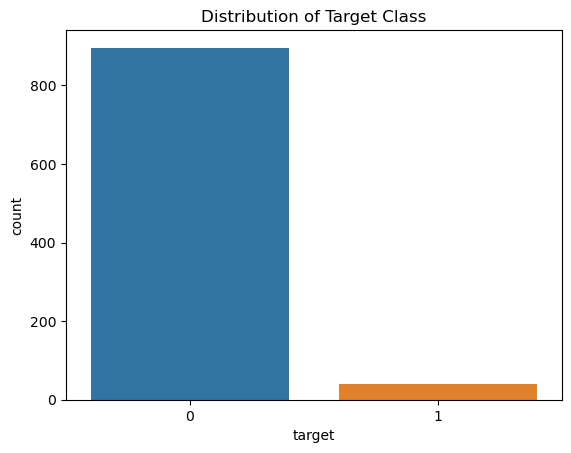

In [941]:
plt.figure()
plt.title('Distribution of Target Class')

g = sns.countplot(x='target', data=df)

### The target class is highly imbalanced. Training the model on this will result in the model overfitting because it predict all 0. While this may be the case because it is much less likely that there is an oil spill, the model will still guess 0 if an oil spill is present. To ensure this is not happening, we will evaluate the model later with a confusion matrix

### To fix the class imbalance, we will synthesize new data using random oversampling

# Splitting data into train, test, and validation sets

In [942]:
# Create a copy of the dataframe and use the sample function to shuffle data
data = df.copy()
data = data.sample(frac=1)

In [943]:
data.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
825,93,12,131.17,390.67,44,97200,53.58,6.47,937.0,0.12,103.7,0.21,0.27,0.35,0.19,0.16,28.60,15.13,0.36,0.21,0.27,55.85,0.96,221.97,0.87,5.07,-0.38,2.35,-1.64,-0.44,1.09,0.0,1.09,9,630,0.01,9.03,82,50,381.84,127.28,42.43,73.48,9.00,0,2699.91,65.90,6.49,0
218,44,91,923.82,1138.51,45,227500,25.18,6.35,2210.0,0.25,102.9,0.26,0.36,0.55,0.20,0.35,28.41,10.93,0.45,0.24,0.34,67.87,0.37,421.21,1.83,14.78,0.27,2.16,-3.27,-0.15,2.16,0.0,2.16,15,900,0.00,21.47,64,39,777.82,353.55,212.13,89.44,3.67,0,12120.43,65.98,7.09,0
254,175,211,1272.77,23.63,118,527500,29.90,8.19,4560.0,0.27,115.7,0.28,0.32,0.58,0.10,0.48,52.82,16.01,0.54,0.23,0.29,67.87,0.44,421.21,1.83,14.78,-0.14,3.85,-3.05,-0.19,2.01,0.0,2.01,62,3420,0.01,39.42,64,39,1185.33,626.50,305.50,130.87,3.88,0,8123.46,65.51,7.84,0
153,144,327,991.40,1363.41,53,817500,42.40,6.44,6440.0,0.15,126.9,0.15,0.16,0.23,0.07,0.16,113.23,51.59,2.45,0.14,0.15,75.26,0.56,351.67,0.18,9.24,0.17,2.67,-2.18,-0.38,2.17,0.0,2.17,81,4950,0.01,50.73,78,55,1250.00,930.05,500.16,176.49,2.50,0,7050.17,66.14,7.12,0
519,25,124,18.93,1387.25,23,174375,23.58,8.20,2732.0,0.35,63.8,0.42,0.52,0.72,0.28,0.44,12.36,4.95,0.64,0.37,0.49,123.47,0.19,2036.80,-0.71,2.96,2.09,11.79,-6.18,-0.82,2.91,0.0,2.91,43,2340,0.01,42.80,143,86,0.00,0.00,0.00,0.00,0.00,0,8922.23,36.02,14.89,0


In [944]:
# Set X to a copy of the shuffled dataframe
X = data.copy()

# Set y to the target column using the pop function which will remove the column from X
y = X.pop('target')

#Number of classes
k = np.unique(y).size

In [945]:
# Scale data using standard scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.fit_transform(X_test)

In [946]:
# Use oversampling to create new data
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 896, 1: 896})


As you can see, there are now equal amount of cases

In [947]:
# Split into train data and remaining data. Remaining data will then be split into test and val data
# Use 80% of data for training, the rest will be split into 10% each for test and val
X_train, X_rem, y_train, y_rem = train_test_split(X_over, y_over, train_size=0.8)

X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [948]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}\n')

print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}\n')

print(f'X_val shape: {X_val.shape}')
print(f'y_val shape: {y_val.shape}\n')

X_train shape: (1433, 48)
y_train shape: (1433,)

X_test shape: (180, 48)
y_test shape: (180,)

X_val shape: (179, 48)
y_val shape: (179,)



In [949]:
# One hot encode labels
y_train_oh = tf.keras.utils.to_categorical(y_train)
y_val_oh = tf.keras.utils.to_categorical(y_val)
y_test_oh = tf.keras.utils.to_categorical(y_test)

print("Labels:")
print(y_train[:5])
print()
print("One hot encoded labels:")
print(y_train_oh[:5])

Labels:
283     0
107     0
1087    1
1116    1
1634    1
Name: target, dtype: int64

One hot encoded labels:
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [950]:
# define model
def my_model(learning_rate = 1e-6):
    inputs = Input(shape=(48,), name='Input')
    hidden1 = Dense(64, activation='relu', name='Hidden1')(inputs)
    hidden2 = Dense(48, activation='relu', name='Hidden2')(hidden1)
    normal = BatchNormalization(name='Normalization')(hidden2)
    hidden3 = Dense(32, activation='relu', name='Hidden3')(normal)
    out1 = Dense(2, activation='sigmoid', name='Output')(hidden3)
    model = Model(inputs=inputs, outputs=out1, name='OilNet')
    sgd = SGD()
    model.compile(optimizer=sgd, loss='binary_crossentropy', metrics = ["accuracy"]) 
    return model

In [951]:
# Summary
model = my_model()
print(model.summary())

Model: "OilNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 48)]              0         
                                                                 
 Hidden1 (Dense)             (None, 64)                3136      
                                                                 
 Hidden2 (Dense)             (None, 48)                3120      
                                                                 
 Normalization (BatchNormali  (None, 48)               192       
 zation)                                                         
                                                                 
 Hidden3 (Dense)             (None, 32)                1568      
                                                                 
 Output (Dense)              (None, 2)                 66        
                                                            

In [952]:
# Define callbacks
callbacks = EarlyStopping(monitor='val_loss', mode='min', patience = 20, verbose=1)

In [953]:
# Define history and train model
batch_size = 64
nb_epoch = 100
n = X_train.shape[0] # number of training examples
history = model.fit(X_train, y_train_oh, validation_data=(X_val,y_val_oh), \
                    batch_size=batch_size, epochs=nb_epoch,verbose=1, callbacks = callbacks)

Epoch 1/100
23/23 [==============================] - 1s 19ms/step - loss: 0.7417 - accuracy: 0.6008 - val_loss: 0.6609 - val_accuracy: 0.5810
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5891 - accuracy: 0.7425 - val_loss: 0.6214 - val_accuracy: 0.6369
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4956 - accuracy: 0.8346 - val_loss: 0.5811 - val_accuracy: 0.7486
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4374 - accuracy: 0.8786 - val_loss: 0.5391 - val_accuracy: 0.8324
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3964 - accuracy: 0.8932 - val_loss: 0.4977 - val_accuracy: 0.8659
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3601 - accuracy: 0.9156 - val_loss: 0.4575 - val_accuracy: 0.8547
Epoch 7/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3284 - accuracy: 0.9225 - val_loss: 0.4218 - val_accuracy: 0.8939
Epoch 8/100


Epoch 59/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0325 - accuracy: 0.9972 - val_loss: 0.0446 - val_accuracy: 0.9832
Epoch 60/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0325 - accuracy: 0.9951 - val_loss: 0.0428 - val_accuracy: 0.9832
Epoch 61/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0296 - accuracy: 0.9965 - val_loss: 0.0425 - val_accuracy: 0.9832
Epoch 62/100
23/23 [==============================] - 0s 5ms/step - loss: 0.0330 - accuracy: 0.9972 - val_loss: 0.0418 - val_accuracy: 0.9832
Epoch 63/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0281 - accuracy: 0.9986 - val_loss: 0.0413 - val_accuracy: 0.9832
Epoch 64/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0273 - accuracy: 0.9993 - val_loss: 0.0418 - val_accuracy: 0.9832
Epoch 65/100
23/23 [==============================] - 0s 6ms/step - loss: 0.0258 - accuracy: 0.9972 - val_loss: 0.0398 - val_accuracy: 0.9832
Epoch 

Final loss (cross-entropy and accuracy): [0.024585021659731865, 0.9944444298744202]

Layer 0
Bias:
 [-0.0068249  -0.05264193 -0.01335141  0.02757121 -0.01521885  0.00064424
  0.02031666 -0.01522401  0.0045556  -0.00397183 -0.00247714  0.00198369
 -0.01131548 -0.00529173  0.00455078 -0.00741036  0.01329583 -0.0228524
 -0.0003389  -0.01811622 -0.02337254  0.01433804 -0.01314243 -0.00721442
 -0.01899937  0.02827921 -0.01077462 -0.01444659  0.02218016 -0.00375005
 -0.00794321 -0.02740692  0.0085382   0.0015578  -0.00528538 -0.00152359
 -0.03587729  0.00574649  0.00804319 -0.01080416 -0.01156431  0.05924794
  0.01863925  0.06202834  0.04663996 -0.02093332  0.04619946 -0.01646082
  0.00499126  0.00101231  0.01701893 -0.00145777 -0.02943195  0.00891258
 -0.01153356 -0.01847056 -0.00620974  0.01723456 -0.00262306 -0.01491231
  0.01374694 -0.00184623  0.00887306 -0.02493765]
W:
 [[ 0.07571955 -0.19235878  0.00091118 ... -0.11251481  0.12249463
  -0.01812778]
 [-0.11867586  0.04211157 -0.2117412

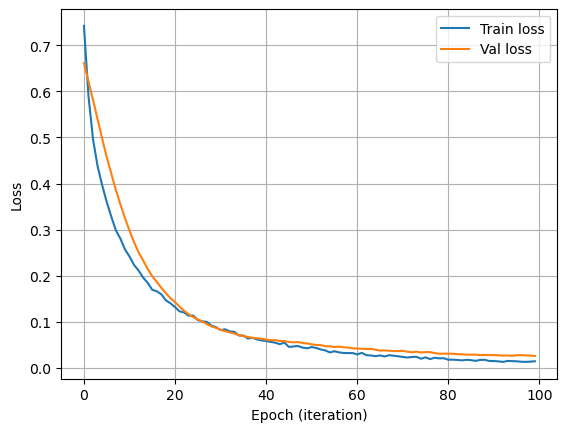

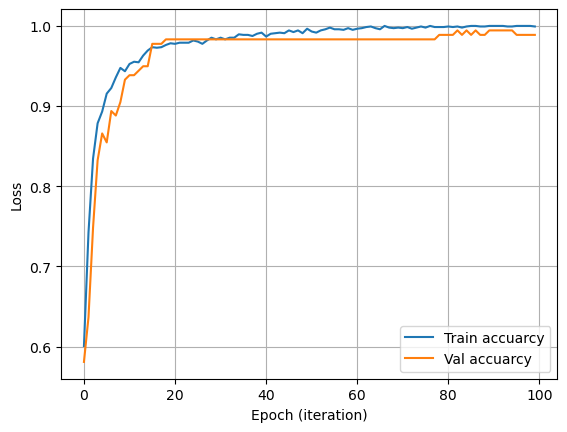

In [958]:
# Evalute Model

# Return model score
loss = model.evaluate(X_test, y_test_oh, verbose=0)

# Print layer biases and weights
print('Final loss (cross-entropy and accuracy):',loss)
print()
W = model.get_weights()
for ii in range(len(W)//2):
    print("Layer %d" %ii)
    print('Bias:\n', W[2*ii + 1])
    print('W:\n', W[2*ii])
    print()

# Plot model loss by epoch
plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Val loss")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Plot accuracy by epoch
plt.plot(history.history['accuracy'], label = "Train accuarcy")
plt.plot(history.history['val_accuracy'], label = "Val accuarcy")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

### Model achieved a score of 99.44 and a cross-entropy loss of 0.0245

In [959]:
# Predict on the test data
y_pred = model.predict(X_test).argmax(axis = 1)

6/6 [==============================] - 0s 2ms/step


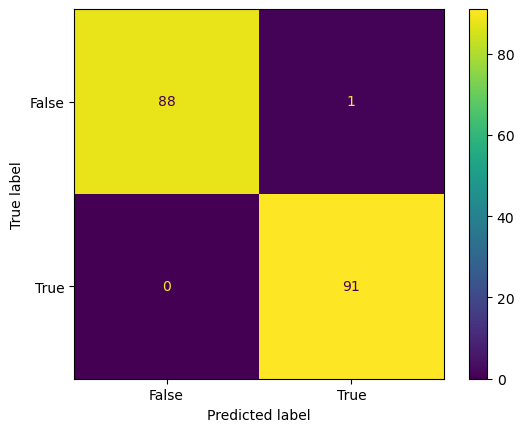

In [960]:
# Plot confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### The confusion matrix returns NxN matrix (in classification 2x2) that compares the actual values with those predicted by the model. 
 - As the plot shows, there were
     - 95 True Positives 
     - 84 True Negatives
     - 0 False Negatives
     - 1 False Positives.